# Naive Bayes Classification

Slides: [CTD Classification Bayes](https://docs.google.com/presentation/d/1rWR8vodxd8uuIWXAcEM4g4cykdxkcC_iTRJKdzal6bM/edit#slide=id.g10dcb87356c_0_19)

Bayes theorem : $P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}$

Naive bayesian classifier assumes attriubtes are independent: $P(x_1, \dots, x_k | C) = P(x_1|C) \times \dots \times P(x_k|C)$

## Load modules

In [1]:
from pprint import pprint
import numpy as np
import scipy.stats
import pandas as pd # see http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

## Mushrooms dataset: load training set, explore and build model

### Run shell commands in jupyter lab

In [2]:
!ls -lh

total 1.9M
-rw-r--r-- 1 barriot barriot 413K Mar  7 15:16 mushrooms.test.data.csv
-rw-r--r-- 1 barriot barriot 435K Apr  5 17:18 mushrooms.test.data.csv.out.csv
-rw-r--r-- 1 barriot barriot 824K Mar  7 15:16 mushrooms.training.data.csv
-rw-r--r-- 1 barriot barriot 225K Apr  5 17:17 naive.bayes.ipynb
-rwxr-xr-x 1 barriot barriot 4.8K Apr  5 17:17 NaiveBayes.pandas.py
-rw-r--r-- 1 barriot barriot 1.9K Mar  7 15:16 README.md
-rw-r--r-- 1 barriot barriot 3.8K Mar  7 15:16 wine.test.data.csv
-rw-r--r-- 1 barriot barriot 4.1K Apr  5 17:18 wine.test.data.csv.out.csv
-rw-r--r-- 1 barriot barriot 7.3K Mar  7 15:16 wine.training.data.csv


In [3]:
!wc mushrooms.training.data.csv

  5611   5611 843296 mushrooms.training.data.csv


In [4]:
!head mushrooms.training.data.csv

class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat
EDIBLE,FLAT,SMOOTH,GRAY,NO,NONE,FREE,CROWDED,BROAD,CHOCOLATE,TAPERING,EQUAL,SMOOTH,FIBROUS,WHITE,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES
EDIBLE,CONVEX,SMOOTH,GRAY,NO,NONE,FREE,CROWDED,BROAD,BLACK,TAPERING,EQUAL,FIBROUS,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,BROWN,SCATTERED,GRASSES
POISONOUS,CONVEX,SCALY,BROWN,NO,SPICY,FREE,CLOSE,NARROW,BUFF,TAPERING,?,SILKY,SILKY,PINK,PINK,PARTIAL,WHITE,ONE,EVANESCENT,WHITE,SEVERAL,PATHS
EDIBLE,FLAT,SMOOTH,BROWN,NO,NONE,FREE,CROWDED,BROAD,PINK,TAPERING,EQUAL,FIBROUS,FIBROUS,WHITE,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES
POISONOUS,KNOBBED,SCALY,RED,NO,SPICY,FREE,CLOSE,NARROW,BUFF,TAPERING,?,SILKY,SILKY,WHITE,WHITE,P

### Load csv files with pandas

Let's start by loading dataset and explore its content

In [5]:
training = 'mushrooms.training.data.csv'
dfm = pd.read_csv(training).dropna(how='any')
dfm

class cap.shape cap.surface cap.color  bruises   odor  \
0        EDIBLE      FLAT      SMOOTH      GRAY       NO   NONE   
1        EDIBLE    CONVEX      SMOOTH      GRAY       NO   NONE   
2     POISONOUS    CONVEX       SCALY     BROWN       NO  SPICY   
3        EDIBLE      FLAT      SMOOTH     BROWN       NO   NONE   
4     POISONOUS   KNOBBED       SCALY       RED       NO  SPICY   
...         ...       ...         ...       ...      ...    ...   
5605     EDIBLE      FLAT     FIBROUS     WHITE       NO   NONE   
5606     EDIBLE    CONVEX      SMOOTH      GRAY       NO   NONE   
5607     EDIBLE    CONVEX       SCALY    YELLOW  BRUISES  ANISE   
5608  POISONOUS   KNOBBED       SCALY       RED       NO  FISHY   
5609     EDIBLE   KNOBBED      SMOOTH     BROWN       NO   FOUL   

     gill.attachment gill.spacing gill.size gill.color  ...  \
0               FREE      CROWDED     BROAD  CHOCOLATE  ...   
1               FREE      CROWDED     BROAD      BLACK  ...   
2               FREE        CLOSE    NARROW       BUFF  ...   
3               FREE      CROWDED     BROAD       PINK  ...   
4               FREE        CLOSE    NARROW       BUFF  ...   
...              ...          ...       ...        ...  ...   
5605            FREE      CROWDED     BROAD      BLACK  ...   
5606            FREE      CROWDED     BROAD       GRAY  ...   
5607            FREE        CLOSE     BROAD      WHITE  ...   
5608            FREE        CLOSE    NARROW       BUFF  ...   
5609            FREE        CLOSE    NARROW       BUFF  ...   

     stalk.surface.below.ring stalk.color.above.ring stalk.color.below.ring  \
0                     FIBROUS                  WHITE                  WHITE   
1                      SMOOTH                  WHITE                  WHITE   
2                       SILKY                   PINK                   PINK   
3                     FIBROUS                  WHITE                  WHITE   
4                       SILKY                  WHITE                  WHITE   
...                       ...                    ...                    ...   
5605                   SMOOTH                  WHITE                  WHITE   
5606                   SMOOTH                  WHITE                  WHITE   
5607                    SCALY                  WHITE                  WHITE   
5608                    SILKY                   PINK                  WHITE   
5609                    SILKY                  WHITE                  WHITE   

     veil.type veil.color ring.number   ring.type spore.print.color  \
0      PARTIAL      WHITE         ONE  EVANESCENT             BLACK   
1      PARTIAL      WHITE         ONE  EVANESCENT             BROWN   
2      PARTIAL      WHITE         ONE  EVANESCENT             WHITE   
3      PARTIAL      WHITE         ONE  EVANESCENT             BLACK   
4      PARTIAL      WHITE         ONE  EVANESCENT             WHITE   
...        ...        ...         ...         ...               ...   
5605   PARTIAL      WHITE         ONE  EVANESCENT             BLACK   
5606   PARTIAL      WHITE         TWO     PENDANT             WHITE   
5607   PARTIAL      WHITE         ONE     PENDANT             BROWN   
5608   PARTIAL      WHITE         ONE  EVANESCENT             WHITE   
5609   PARTIAL      WHITE         ONE  EVANESCENT             WHITE   

     population  habitat  
0      ABUNDANT  GRASSES  
1     SCATTERED  GRASSES  
2       SEVERAL    PATHS  
3      ABUNDANT  GRASSES  
4       SEVERAL    PATHS  
...         ...      ...  
5605  SCATTERED  GRASSES  
5606   NUMEROUS  GRASSES  
5607   SOLITARY  GRASSES  
5608    SEVERAL    WOODS  
5609    SEVERAL   LEAVES  

[5610 rows x 23 columns]

### Access columns

`describe` content of a panda dataframe

In [6]:
dfm.describe()

class cap.shape cap.surface cap.color bruises  odor gill.attachment  \
count     5610      5610        5610      5610    5610  5610            5610   
unique       2         6           4        10       2     9               2   
top     EDIBLE    CONVEX       SCALY     BROWN      NO  NONE            FREE   
freq      3039      2524        2182      1570    3338  2558            5466   

       gill.spacing gill.size gill.color  ... stalk.surface.below.ring  \
count          5610      5610       5610  ...                     5610   
unique            2         2         12  ...                        4   
top           CLOSE     BROAD       BUFF  ...                   SMOOTH   
freq           4543      3910       1167  ...                     3431   

       stalk.color.above.ring stalk.color.below.ring veil.type veil.color  \
count                    5610                   5610      5610       5610   
unique                      9                      9         1          4   
top                     WHITE                  WHITE   PARTIAL      WHITE   
freq                     3173                   3131      5610       5478   

       ring.number ring.type spore.print.color population habitat  
count         5610      5610              5610       5610    5610  
unique           3         5                 9          6       7  
top            ONE   PENDANT             WHITE    SEVERAL   WOODS  
freq          5168      2658              1641       2684    2077  

[4 rows x 23 columns]

get the the list of column names

In [7]:
dfm.columns

Index(['class', 'cap.shape', 'cap.surface', 'cap.color', 'bruises', 'odor',
       'gill.attachment', 'gill.spacing', 'gill.size', 'gill.color',
       'stalk.shape', 'stalk.root', 'stalk.surface.above.ring',
       'stalk.surface.below.ring', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'veil.type', 'veil.color', 'ring.number',
       'ring.type', 'spore.print.color', 'population', 'habitat'],
      dtype='object')

access one column by its name

In [8]:
dfm['class']

0          EDIBLE
1          EDIBLE
2       POISONOUS
3          EDIBLE
4       POISONOUS
          ...    
5605       EDIBLE
5606       EDIBLE
5607       EDIBLE
5608    POISONOUS
5609       EDIBLE
Name: class, Length: 5610, dtype: object

directement (avec le .) si le nom de colonne le permet :

### Determine column type

Column is numeric or nominal values?

In [9]:
pd.api.types.is_numeric_dtype(dfm.odor)

False

In [10]:
is_string_dtype(dfm.odor)

True

# p(class=EDIBLE)

In [11]:
dfm['class'].astype('category')

0          EDIBLE
1          EDIBLE
2       POISONOUS
3          EDIBLE
4       POISONOUS
          ...    
5605       EDIBLE
5606       EDIBLE
5607       EDIBLE
5608    POISONOUS
5609       EDIBLE
Name: class, Length: 5610, dtype: category
Categories (2, object): ['EDIBLE', 'POISONOUS']

**Note :** `dtype` is now `category` and not `object` as before

In [12]:
dfm['class'].count()

5610

In [13]:
dfm['class'].astype('category').value_counts()

class
EDIBLE       3039
POISONOUS    2571
Name: count, dtype: int64

As frequencies

In [14]:
p_c = dfm['class'].astype('category').value_counts() / dfm['class'].count()
p_c

class
EDIBLE       0.541711
POISONOUS    0.458289
Name: count, dtype: float64

In [15]:
p_c['EDIBLE']

0.5417112299465241

### other attributes/columns
access a single column

In [16]:
dfm.odor

0        NONE
1        NONE
2       SPICY
3        NONE
4       SPICY
        ...  
5605     NONE
5606     NONE
5607    ANISE
5608    FISHY
5609     FOUL
Name: odor, Length: 5610, dtype: object

access a **subset** of rows and columns

In [17]:
dfm.loc[ : , ('class','odor')]

class   odor
0        EDIBLE   NONE
1        EDIBLE   NONE
2     POISONOUS  SPICY
3        EDIBLE   NONE
4     POISONOUS  SPICY
...         ...    ...
5605     EDIBLE   NONE
5606     EDIBLE   NONE
5607     EDIBLE  ANISE
5608  POISONOUS  FISHY
5609     EDIBLE   FOUL

[5610 rows x 2 columns]

In [18]:
dfm.odor.describe()

count     5610
unique       9
top       NONE
freq      2558
Name: odor, dtype: object

### Categories, and crosstab to compute P(X=x / C=c)

In [19]:
dfm.odor.astype('category')

0        NONE
1        NONE
2       SPICY
3        NONE
4       SPICY
        ...  
5605     NONE
5606     NONE
5607    ANISE
5608    FISHY
5609     FOUL
Name: odor, Length: 5610, dtype: category
Categories (9, object): ['ALMOND', 'ANISE', 'CREOSOTE', 'FISHY', ..., 'MUSTY', 'NONE', 'PUNGENT', 'SPICY']

Levels as list

In [20]:
dfm.odor.astype('category').cat.categories

Index(['ALMOND', 'ANISE', 'CREOSOTE', 'FISHY', 'FOUL', 'MUSTY', 'NONE',
       'PUNGENT', 'SPICY'],
      dtype='object')

Obtain a crosstab from levels of 2 columns

In [21]:
pd.crosstab( dfm['class'], dfm.odor)

odor       ALMOND  ANISE  CREOSOTE  FISHY  FOUL  MUSTY  NONE  PUNGENT  SPICY
class                                                                       
EDIBLE        254    267         7     20    84      0  2380        7     20
POISONOUS      10     20       120    355  1310     33   178      169    376

<Axes: xlabel='class'>

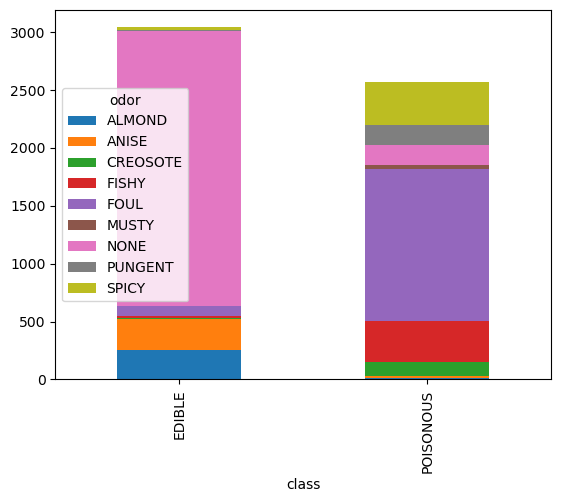

In [22]:
pd.crosstab( dfm['class'], dfm.odor).plot(kind='bar', stacked=True)

Compute frequencies of each odor per row/class 

In [23]:
pd.crosstab( dfm['class'], dfm.odor).apply(lambda x: x/np.sum(x), axis=1)

odor        ALMOND     ANISE  CREOSOTE     FISHY      FOUL     MUSTY  \
class                                                                  
EDIBLE     0.08358  0.087858  0.002303  0.006581  0.027641  0.000000   
POISONOUS  0.00389  0.007779  0.046674  0.138079  0.509529  0.012835   

odor           NONE   PUNGENT     SPICY  
class                                    
EDIBLE     0.783152  0.002303  0.006581  
POISONOUS  0.069234  0.065733  0.146247

# p(odor=SPICY / class=POISONOUS )

In [24]:
p_c_odor = pd.crosstab( dfm['class'], dfm.odor).apply(lambda x: x/np.sum(x), axis=1)
p_c_odor['SPICY']['POISONOUS']

0.14624659665499806

## Build probability table model
For the mushrooms dataset, we know that the first column *class* is the known class column and that all the following are the attributes/variables and are categorical.

In [25]:
class_att = dfm.columns[0]
model = {} # a dict!!
for a in dfm.columns:
    model[a] = { 'name': a, 'is_nominal': is_string_dtype(dfm[a]), 'levels': dfm[a].astype('category').cat.categories, 'levels_n':  dfm[a].astype('category').value_counts(), 'levels_f': dfm[a].astype('category').value_counts() / dfm[a].count() }
    if a!=class_att:
        model[a]['xtab_n'] = pd.crosstab(dfm[class_att], dfm[a])
        model[a]['xtab_f'] = model[a]['xtab_n'].apply(lambda x: x/np.sum(x), axis=1)

In [26]:
model[class_att]

{'name': 'class',
 'is_nominal': True,
 'levels': Index(['EDIBLE', 'POISONOUS'], dtype='object'),
 'levels_n': class
 EDIBLE       3039
 POISONOUS    2571
 Name: count, dtype: int64,
 'levels_f': class
 EDIBLE       0.541711
 POISONOUS    0.458289
 Name: count, dtype: float64}

In [27]:
model['odor']

{'name': 'odor',
 'is_nominal': True,
 'levels': Index(['ALMOND', 'ANISE', 'CREOSOTE', 'FISHY', 'FOUL', 'MUSTY', 'NONE',
        'PUNGENT', 'SPICY'],
       dtype='object'),
 'levels_n': odor
 NONE        2558
 FOUL        1394
 SPICY        396
 FISHY        375
 ANISE        287
 ALMOND       264
 PUNGENT      176
 CREOSOTE     127
 MUSTY         33
 Name: count, dtype: int64,
 'levels_f': odor
 NONE        0.455971
 FOUL        0.248485
 SPICY       0.070588
 FISHY       0.066845
 ANISE       0.051159
 ALMOND      0.047059
 PUNGENT     0.031373
 CREOSOTE    0.022638
 MUSTY       0.005882
 Name: count, dtype: float64,
 'xtab_n': odor       ALMOND  ANISE  CREOSOTE  FISHY  FOUL  MUSTY  NONE  PUNGENT  SPICY
 class                                                                       
 EDIBLE        254    267         7     20    84      0  2380        7     20
 POISONOUS      10     20       120    355  1310     33   178      169    376,
 'xtab_f': odor        ALMOND     ANISE  CREOSOTE

# P(C=c / X=x) = P(X=x / C=c) * P(C=c)   [/ P(X=x)]

Load test set

In [28]:
!ls

mushrooms.test.data.csv		 README.md
mushrooms.test.data.csv.out.csv  wine.test.data.csv
mushrooms.training.data.csv	 wine.test.data.csv.out.csv
naive.bayes.ipynb		 wine.training.data.csv
NaiveBayes.pandas.py


In [29]:
dfmt = pd.read_csv("mushrooms.test.data.csv")
dfmt

class cap.shape cap.surface cap.color  bruises    odor  \
0        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND   
1        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND   
2        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES   ANISE   
3     POISONOUS    CONVEX      SMOOTH     WHITE  BRUISES   ANISE   
4        EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES  ALMOND   
...         ...       ...         ...       ...      ...     ...   
2801     EDIBLE   KNOBBED      SMOOTH     BROWN       NO    NONE   
2802     EDIBLE   KNOBBED      SMOOTH     BROWN       NO    NONE   
2803     EDIBLE   KNOBBED      SMOOTH     BROWN       NO    NONE   
2804     EDIBLE   KNOBBED      SMOOTH     BROWN       NO    NONE   
2805     EDIBLE   KNOBBED      SMOOTH     BROWN       NO    NONE   

     gill.attachment gill.spacing gill.size gill.color  ...  \
0               FREE      CROWDED    NARROW      WHITE  ...   
1               FREE      CROWDED    NARROW      BROWN  ...   
2               FREE      CROWDED    NARROW       PINK  ...   
3               FREE      CROWDED    NARROW       PINK  ...   
4               FREE      CROWDED    NARROW       PINK  ...   
...              ...          ...       ...        ...  ...   
2801        ATTACHED        CLOSE     BROAD      BROWN  ...   
2802        ATTACHED        CLOSE     BROAD      BROWN  ...   
2803        ATTACHED        CLOSE     BROAD      BROWN  ...   
2804        ATTACHED        CLOSE     BROAD      BROWN  ...   
2805        ATTACHED        CLOSE     BROAD      BROWN  ...   

     stalk.surface.below.ring stalk.color.above.ring stalk.color.below.ring  \
0                      SMOOTH                  WHITE                  WHITE   
1                      SMOOTH                  WHITE                  WHITE   
2                      SMOOTH                  WHITE                  WHITE   
3                      SMOOTH                  WHITE                  WHITE   
4                      SMOOTH                  WHITE                  WHITE   
...                       ...                    ...                    ...   
2801                   SMOOTH                 ORANGE                 ORANGE   
2802                   SMOOTH                 ORANGE                 ORANGE   
2803                   SMOOTH                 ORANGE                 ORANGE   
2804                   SMOOTH                 ORANGE                 ORANGE   
2805                   SMOOTH                 ORANGE                 ORANGE   

     veil.type veil.color ring.number ring.type spore.print.color population  \
0      PARTIAL      WHITE         ONE   PENDANT            PURPLE    SEVERAL   
1      PARTIAL      WHITE         ONE   PENDANT             BROWN    SEVERAL   
2      PARTIAL      WHITE         ONE   PENDANT            PURPLE    SEVERAL   
3      PARTIAL      WHITE         ONE   PENDANT             BROWN    SEVERAL   
4      PARTIAL      WHITE         ONE   PENDANT            PURPLE    SEVERAL   
...        ...        ...         ...       ...               ...        ...   
2801   PARTIAL     ORANGE         ONE   PENDANT              BUFF  CLUSTERED   
2802   PARTIAL      BROWN         ONE   PENDANT            YELLOW    SEVERAL   
2803   PARTIAL      BROWN         ONE   PENDANT             BROWN    SEVERAL   
2804   PARTIAL      BROWN         ONE   PENDANT             BROWN  CLUSTERED   
2805   PARTIAL      BROWN         ONE   PENDANT            ORANGE    SEVERAL   

     habitat  
0      WOODS  
1      WOODS  
2      WOODS  
3      WOODS  
4      WOODS  
...      ...  
2801  LEAVES  
2802  LEAVES  
2803  LEAVES  
2804  LEAVES  
2805  LEAVES  

[2806 rows x 23 columns]

In [30]:
x = dfmt.loc[0,:]
x

class                         EDIBLE
cap.shape                     CONVEX
cap.surface                   SMOOTH
cap.color                      WHITE
bruises                      BRUISES
odor                          ALMOND
gill.attachment                 FREE
gill.spacing                 CROWDED
gill.size                     NARROW
gill.color                     WHITE
stalk.shape                 TAPERING
stalk.root                   BULBOUS
stalk.surface.above.ring      SMOOTH
stalk.surface.below.ring      SMOOTH
stalk.color.above.ring         WHITE
stalk.color.below.ring         WHITE
veil.type                    PARTIAL
veil.color                     WHITE
ring.number                      ONE
ring.type                    PENDANT
spore.print.color             PURPLE
population                   SEVERAL
habitat                        WOODS
Name: 0, dtype: object

possible classes

In [31]:
model[class_att]['levels']

Index(['EDIBLE', 'POISONOUS'], dtype='object')

In [32]:
model[class_att]['levels_f']

class
EDIBLE       0.541711
POISONOUS    0.458289
Name: count, dtype: float64

In [33]:
c = model[class_att]['levels'][0]
c

'EDIBLE'

P(Class = Edible):

In [34]:
p = model[class_att]['levels_f'][c]
p

0.5417112299465241

Now multiply P(C=c) with each attribute Xk P(Xk / C=Edible)

In [35]:
for a in model:
    if a != class_att:
        p *= model[a]['xtab_f'][ x[a] ][ c ] 
p

1.5498420542870518e-10

We have P(C=Edible)*P(X/Edible) = 1.55e-10

Let's do the computation for the other class

In [36]:
c = model[class_att]['levels'][1]
c

'POISONOUS'

In [37]:
p = model[class_att]['levels_f'][c]
p

0.45828877005347596

In [38]:
for a in model:
    if a != class_att:
        p *= model[a]['xtab_f'][ x[a] ][ c ] 
p

1.308978885718532e-15

P(C=Poisonous) * P(X/Poisonous) = 1.31e-15 < P(C=Edible)*P(X/Edible) and thus we predict:

→ Best class is EDIBLE

# A faire à présent

Maintenant que l'ensemble des commandes pour classer un objet à été effectué, il s'agit de les synthétiser dans un `script` pour pouvoir le lancer dans un shell et qui :

  * charge le jeu d'apprentissage (dont le nom du fichier sera passé en paramètre)
  * construit le modèle (table de probabilité)
  * charge le jeu de test
  * classe chaque objet du jeu de test
  * affiche le modèle ou les performances (selon les paramètres passés en ligne de commandes)
  
  Le script devrait commencer comme suit :

Utilisation du script (après l'avoir écrit) dans un shell

In [39]:
!./NaiveBayes.pandas.py --help

usage: NaiveBayes.pandas.py [-h] -t TRAINING [-u TEST] [-s SAMPLE]
                            [-m [MODEL]] [-d DELIMITER] [-c COLUMN_CLASS]
                            [-x NA_VALUES] [-v]

Naive Bayesian learner and classifier.

optional arguments:
  -h, --help            show this help message and exit
  -t TRAINING, --training TRAINING
                        CSV File with a header row in containing training
                        examples.
  -u TEST, --test TEST  CSV File with a header row containing new objects to
                        be classified for performance evaluation.
  -s SAMPLE, --sample SAMPLE
                        CSV File with a header row containing new objects to
                        be classified. NOT YET IMPLEMENTED
  -m [MODEL], --model [MODEL]
                        Only displays the probability table.
  -d DELIMITER, --delimiter DELIMITER
                        Field delimiter in CSV files.
  -c COLUMN_CLASS, --column-class COLUMN_CLASS
             

In [40]:
!./NaiveBayes.pandas.py -t mushrooms.training.data.csv -u mushrooms.test.data.csv

Ignoring variable veil.type as it has only one level

Tests: 2806 , Errors: 320 , Error rate: 11.4 %

Confusion matrix
 predicted_class  EDIBLE  POISONOUS
class                             
EDIBLE             1374         66
POISONOUS           254       1112


## Wine dataset: load training set, explore and build model

In [41]:
!ls

mushrooms.test.data.csv		 README.md
mushrooms.test.data.csv.out.csv  wine.test.data.csv
mushrooms.training.data.csv	 wine.test.data.csv.out.csv
naive.bayes.ipynb		 wine.training.data.csv
NaiveBayes.pandas.py


In [42]:
dfw = pd.read_csv("wine.training.data.csv")
dfw

cultivar  alcohol  malic-acid   ash  alcalinity-of-ash  magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   
..        ...      ...         ...   ...                ...        ...   
114         3    13.40        3.91  2.48               23.0        102   
115         3    13.27        4.28  2.26               20.0        120   
116         3    13.17        2.59  2.37               20.0        120   
117         3    14.13        4.10  2.74               24.5         96   
118         3    13.50        3.12  2.62               24.0        123   

     total-phenols  flavonoids  nonflavonoid-phenols  proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
114           1.80        0.75                  0.43             1.41   
115           1.59        0.69                  0.43             1.35   
116           1.65        0.68                  0.53             1.46   
117           2.05        0.76                  0.56             1.35   
118           1.40        1.57                  0.22             1.25   

     color-intensity   hue  od280-od315-of-diluted-wines  proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
114             7.30  0.70                          1.56      750  
115            10.20  0.59                          1.56      835  
116             9.30  0.60                          1.62      840  
117             9.20  0.61                          1.60      560  
118             8.60  0.59                          1.30      500  

[119 rows x 14 columns]

some easy plots

<Axes: ylabel='Frequency'>

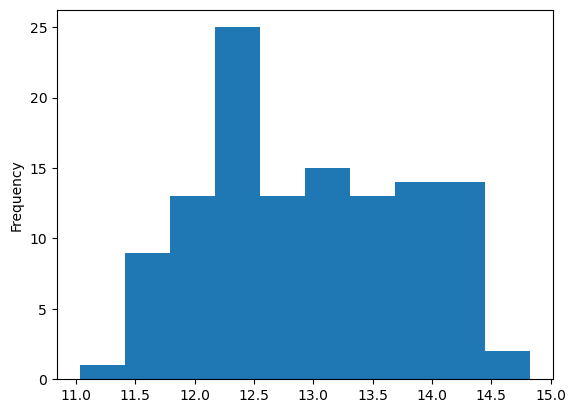

In [43]:
dfw.alcohol.plot(kind='hist')

array([<Axes: title={'center': '1'}, ylabel='Frequency'>,
       <Axes: title={'center': '2'}, ylabel='Frequency'>,
       <Axes: title={'center': '3'}, ylabel='Frequency'>], dtype=object)

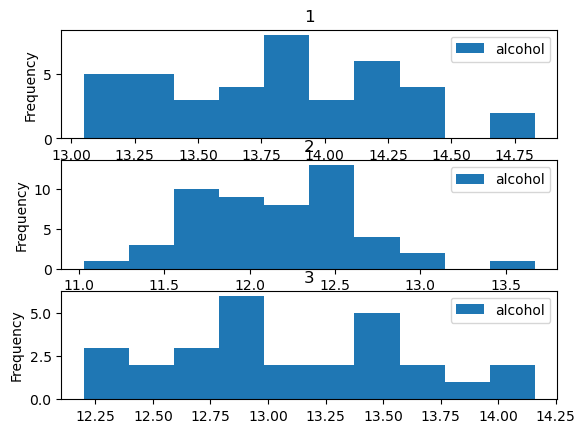

In [44]:
dfw.loc[:,('cultivar','alcohol')].plot(kind='hist', by='cultivar')

<Axes: title={'center': 'alcohol'}, xlabel='[cultivar]'>

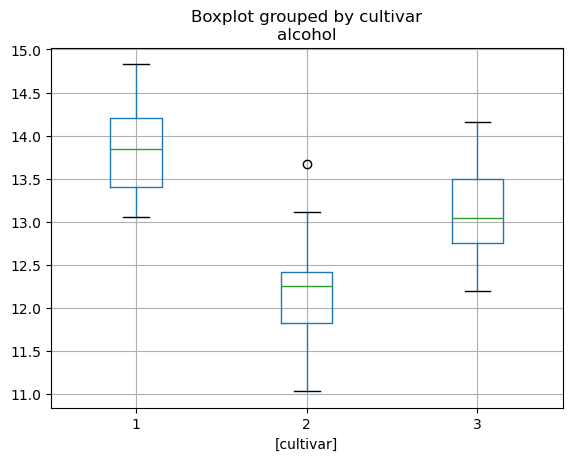

In [45]:
dfw.loc[:,('cultivar','alcohol')].boxplot(by='cultivar')

<Axes: xlabel='alcohol', ylabel='flavonoids'>

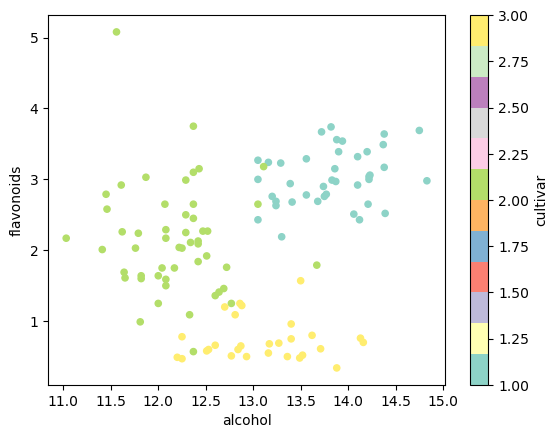

In [46]:
dfw.plot('alcohol','flavonoids', kind='scatter', c='cultivar', cmap='Set3')

Build the model

In [47]:
class_att = dfw.columns[0]
dfw[class_att] = dfw[class_att].astype('category')
model = { class_att: {'name': class_att, 'is_nominal': True, 'levels': dfw[class_att].cat.categories, 'levels_n': dfw[class_att].value_counts(), 'levels_f': dfw[class_att].value_counts() / dfw[class_att].count() } }
model

{'cultivar': {'name': 'cultivar',
  'is_nominal': True,
  'levels': Index([1, 2, 3], dtype='int64'),
  'levels_n': cultivar
  2    51
  1    40
  3    28
  Name: count, dtype: int64,
  'levels_f': cultivar
  2    0.428571
  1    0.336134
  3    0.235294
  Name: count, dtype: float64}}

In [48]:
for a in dfw.columns:
    is_nominal = is_string_dtype(dfw[a])
    model[a] = { 'name': a, 'is_nominal': is_nominal }
    if a!=class_att:
        model[a]['mean'] = np.mean( dfw[a] )
        model[a]['std']  = np.std ( dfw[a] )
        model[a]['xtab_mean'] = dfw.pivot_table(index=class_att, values=a, aggfunc="mean",  observed=False)
        model[a]['xtab_std'] = dfw.pivot_table(index=class_att, values=a, aggfunc="std",  observed=False)

In [49]:
model['alcohol']

{'name': 'alcohol',
 'is_nominal': False,
 'mean': 12.947815126050424,
 'std': 0.8658295285703255,
 'xtab_mean':             alcohol
 cultivar           
 1         13.820500
 2         12.180392
 3         13.098929,
 'xtab_std':            alcohol
 cultivar          
 1         0.469904
 2         0.478840
 3         0.544170}

other plots : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots

# A faire

Compléter le script précédent afin qu'il détermine le type des colonnes du jeu de données et qu'il construise le modèle en fonction du type des colonnes (table de probabilité ou loi normale).

Utilisation du script (une fois écrit):


In [50]:
!./NaiveBayes.pandas.py -t wine.training.data.csv -u wine.test.data.csv 


Tests: 60 , Errors: 3 , Error rate: 5.0 %

Confusion matrix
 predicted_class   1   2   3
cultivar                   
1                18   1   0
2                 0  18   2
3                 0   0  21
